In [1]:
import nbimporter
from SaturatedVaporPressure import get_saturated_vapor_pressure as get_svp

import matplotlib.pyplot as plt

Importing Jupyter notebook from SaturatedVaporPressure.ipynb


# Vapor Pressure

## 1. Introduction

## 2. Functions

### 2.1 Vapor Pressure and Absolute Humidity

$$
P_v = P_{atm} \times \frac{X}{(0.622 + X)}
$$

$$
X = 0.622 \times \frac{P_v}{(P_{atm}-P_v)}
$$

Where  
$P_V$ is the vapor pressure (Pa);  
$P_{atm}$ is the atmospheric pressure (Pa) ( = 101325 );  
$X$ is the absolute humidity (kg/kgDA).

#### Basis

Based on Dalton's law,  

$ p_i = p_{total} \times x_{i} $  

where  
$p_i$ is the partial pressures of each component (Pa);  
$p_{total}$ is the total pressure (Pa);  
$x_i$ is the mole fraction of the $i$ th component.

In case of the absolute humidity of $X$,  
the weight ratio is;  
$ \text{air} : \text{vapor} = 1 : X $.  
The mole fraction ration is;  
$ \text{air} : \text{vapor} = 1 / 28.966 : X / 18.0 = 18.0 / 28.966 : X \simeq 0.622 : X $  
Because,
the moleculer number of water (H<sub>2</sub>O) is 18.0.  
And, the moleculer number of air is 28.8 ( $ 32 \times 0.2 +28 \times 0.8 =28.8 $ ) ( O<sub>2</sub> = 32, N<sub>2</sub> =28 ) and assumed that the air is composed of O<sub>2</sub> of 80% and N<sub>2</sub> of 20%.  
Actually, the air include the other components such as argon and carbon dioxide, and then the moleculer number of air is assumed to be 28.966 (g/mol) here.


In [2]:
def ah_to_pv(X):
    patm = 101325
    return patm * X / ( 0.622 + X )

In [3]:
def pv_to_ah(pv):
    patm = 101325
    return 0.622 * pv / ( patm - pv )

#### Example

In [4]:
pv_to_ah(500)

0.0030845524423506075

In [5]:
ah_to_pv(0.0030845524423506075)

500.0

### 2.2 Relative Humidity and Vapor Pressure

$$
\phi = \frac{p_v}{p_{sv}} \times 100
$$

$$
p_v = p_{sv} \times \frac{\phi}{100}
$$

Where  
$P_V$ is the vapor pressure (Pa);  
$P_{sv}$ is the saturated vapor pressure (Pa);  
$\psi$ is the relative humidity (0~100) (%).

In [6]:
def pv_to_rh(pv,T,svpeq,status):
    return pv / get_svp(svpeq,status,T) * 100

In [7]:
def rh_to_pv(rh,T,svpeq,status):
    return get_svp(svpeq,status,T) * rh / 100

#### Example

In [8]:
pv_to_rh(1000,303.15,'SONNTAG','water')

23.54587078514155

In [9]:
rh_to_pv(23.54587078514155,303.15,'SONNTAG','water')

1000.0

### 2.3 Absolute and Relative Humidity

Relative humidity (%) to absolute humidity (kg/kgDA).

In [10]:
def rh_to_ah(rh,T,svpeq,status):
    pv = rh_to_pv(rh,T,svpeq,status)
    return pv_to_ah(pv)

Absolute humidity (kg/kgDA) to relative humidity (%).

In [11]:
def ah_to_rh(X,T,svpeq,status):
    pv = ah_to_pv(X)
    return pv_to_rh(pv,T,svpeq,status)

#### Example 1

In [12]:
rh_to_ah(50.0,298.15,'SONNTAG','water')

0.009884095183878179

In [13]:
ah_to_rh(0.009884095183878179,298.15,'SONNTAG','water')

49.99999999999999

#### Example 2

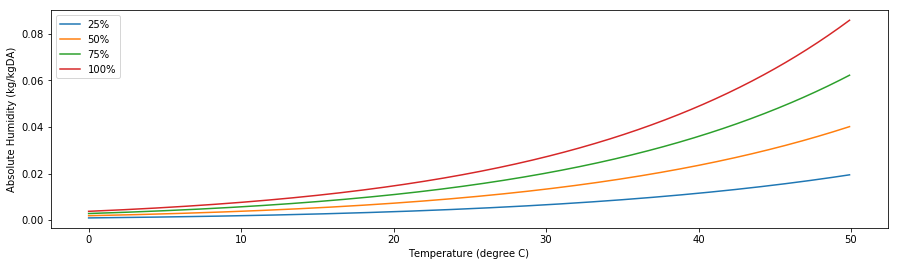

In [14]:
temp = [ 0.1 * x for x in range(0,500)]
plt.figure( figsize = (15,4) )
for rh in [25,50,75,100]:
    ah = [ rh_to_ah(rh, t + 273.15, 'SONNTAG', 'water') for t in temp ] 
    plt.plot(temp,ah,label= str(rh) + '%')
plt.legend()
plt.xlabel('Temperature (degree C)')
plt.ylabel('Absolute Humidity (kg/kgDA)')
plt.show()

### 2.4 Saturated Absolute Humidity

In [15]:
def get_saturated_absolute_humidity(T, svpeq, status):
    svp = get_svp(svpeq,status,T)
    return pv_to_ah(svp)

#### Example

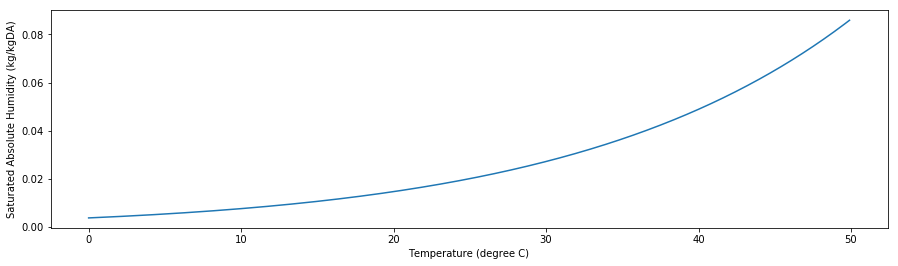

In [16]:
temp = [ 0.1 * x for x in range(0,500)]
plt.figure( figsize = (15,4) )
ah = [ get_saturated_absolute_humidity(t + 273.15, 'SONNTAG', 'water') for t in temp ] 
plt.plot(temp,ah)
plt.xlabel('Temperature (degree C)')
plt.ylabel('Saturated Absolute Humidity (kg/kgDA)')
plt.show()

### 2.5 Dew Point Temperature

In [17]:
def get_dew_point_temp(ah, svpeq, status):
    # use Bisection method
    TL = 0.0    # T = 0.0 (K)
    TH = 373.15 # T = 373.15 (K) = 100.0 (degree C)
    n = 0 # Counter
    nmax = 10000 # Maximum number of attempts
    while True:
        T = ( TH + TL )/2
        sah = get_saturated_absolute_humidity(T, svpeq, status)
        if abs( sah - ah ) < 1.0e-7:
            break
        n = n + 1
        if n >= nmax:
            raise Error('Error: Not converged in the calculation of the dew point temperature.')
        if ah < sah:
            TH = T
        else:
            TL = T
    return T

#### Example

In [18]:
get_saturated_absolute_humidity(293.15, 'SONNTAG', 'water')

0.014699216458052453

In [19]:
get_dew_point_temp(0.014699216458052453, 'SONNTAG', 'water')

293.1500898838043